### compare results at different gamma values

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import linregress

%matplotlib inline

/Users/jpw/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
colnames = ['Source', 'dist', 'lambda', 'Rmm90', 'RCO90', 'Mdust', 'Lstar', 'Teff', 'Mstar', 'age', 'Ref']
df0 = pd.read_csv('ALL_combined_table.txt', skiprows=2, header=0, sep='\s+', names=colnames)

In [3]:
colnames = ['Source', 't_star', 't_drift_min', 't_drift_max', 'M_min', 'M_max']
df1 = pd.read_csv('drift_fit_results.txt', skiprows=1, header=0, sep='\s+', names=colnames)
df2 = pd.read_csv('Q2/drift_fit_results_Q2.txt', skiprows=1, header=0, sep='\s+', names=colnames)
#df2 = pd.read_csv('Q3/drift_fit_results_Q3.txt', skiprows=1, header=0, sep='\s+', names=colnames)
#df2 = pd.read_csv('Q5/drift_fit_results_Q5.txt', skiprows=1, header=0, sep='\s+', names=colnames)

In [4]:
df_merge = df0[['Source', 'Lstar', 'Teff', 'Mstar', 'age']]

In [5]:
df_merge = df_merge.merge(df1[['Source', 'M_min', 'M_max']], on='Source')

In [6]:
df_merge = df_merge.merge(df2[['Source', 'M_min', 'M_max']], on='Source', suffixes=('1','2'))

In [7]:
df_merge

,Source,Lstar,Teff,Mstar,age,M_min1,M_max1,M_min2,M_max2
0,AS209,1.41,4266,0.83,1.0,0.0321,0.2768,0.0321,0.1429
1,CIDA1,0.20,3200,0.19,1.0,0.0021,0.0885,0.0021,0.0481
2,CIDA7,0.08,3111,0.15,2.0,0.0015,0.0632,0.0015,0.0334
3,CITau,0.81,4277,0.90,2.5,0.0159,0.3389,0.0159,0.1581
4,CXTau,0.25,3488,0.38,1.6,0.0015,0.1115,0.0015,0.0599
5,CYTau,0.25,3560,0.30,2.3,0.0189,0.1465,0.0189,0.0782
6,DLTau,0.65,4277,1.05,3.2,0.0390,0.3712,0.0390,0.1834
7,DMTau,0.14,3415,0.55,3.2,0.0102,0.2775,0.0102,0.1416
8,DNTau,0.69,3806,0.87,0.9,0.0129,0.2445,0.0129,0.1209
9,DoAr25,0.95,4266,0.95,2.0,0.0357,0.2567,0.0357,0.1310


Mdust vs Mstar slope =  0.01, intercept =  0.00
Mgrav(Q=1) vs Mstar slope =  0.21, intercept =  0.06
Mgrav(Q=2) vs Mstar slope =  0.11, intercept =  0.03


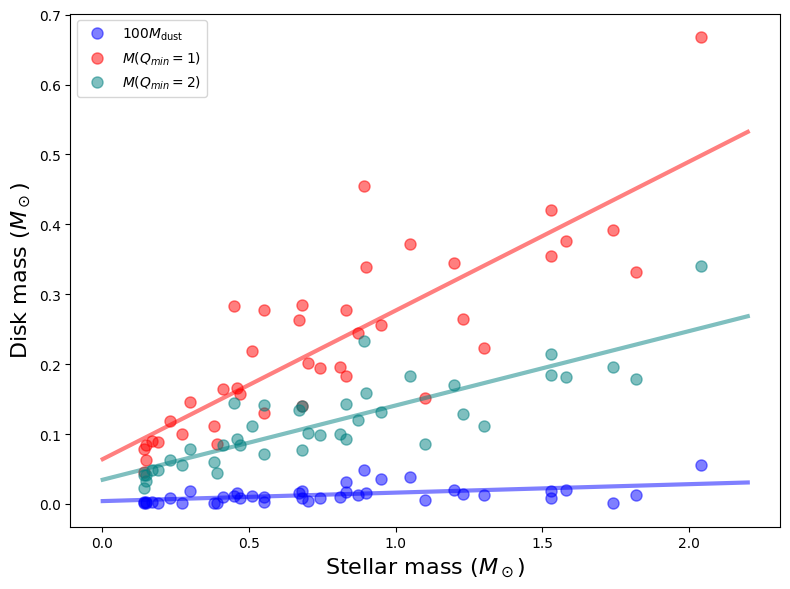

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

x = df_merge['Mstar']
y = df_merge['M_min1']
z1 = df_merge['M_max1']
z2 = df_merge['M_max2']

# y = a + bx
lmin = linregress(x, y)
lmax1 = linregress(x, z1)
lmax2 = linregress(x, z2)
xline = np.array([0.001, 2.2])

ax.plot(x, y, 'bo', alpha=0.5, ms=8, label=r'$100M_{\rm dust}$')
ax.plot(xline, lmin.intercept + lmin.slope * xline, 'b', alpha=0.5, lw=3)
ax.plot(x, z1, 'ro', alpha=0.5, ms=8, label=r'$M(Q_{min}=1)$')
ax.plot(xline, lmax1.intercept + lmax1.slope * xline, 'r', alpha=0.5, lw=3)
ax.plot(x, z2, 'o', color='teal', alpha=0.5, ms=8, label=r'$M(Q_{min}=2)$')
ax.plot(xline, lmax2.intercept + lmax2.slope * xline, 'teal', alpha=0.5, lw=3)
ax.legend()
ax.set_xlabel(r"Stellar mass ($M_\odot$)", fontsize=16)
ax.set_ylabel(r"Disk mass ($M_\odot$)", fontsize=16)

print(f"Mdust vs Mstar slope = {lmin.slope:5.2f}, intercept = {lmin.intercept:5.2f}")
print(f"Mgrav(Q=1) vs Mstar slope = {lmax1.slope:5.2f}, intercept = {lmax1.intercept:5.2f}")
print(f"Mgrav(Q=2) vs Mstar slope = {lmax2.slope:5.2f}, intercept = {lmax2.intercept:5.2f}")

fig.tight_layout()
fig.savefig('mass.pdf')